Crear un modelo de aprendizaje automático (ML) para un conjunto de datos de Alzheimer puede ser un proceso desafiante pero gratificante. Aquí te presento una introducción general a los pasos que podrías seguir:

1. **Comprensión del problema**: El primer paso es entender el problema que estás tratando de resolver. En nuestro, a paritir de un conjunto de datos de Alzheimer, nos interesa  predecir el diagnóstico de un paciente basándonos en una serie de características, como los resultados de pruebas cognitivas, factores genéticos , demográficos y edad

2. **Análisis exploratorio de datos**: Este paso implica explorar y entender tus datos. . Esto implico la creación de gráficos, el cálculo de estadísticas descriptivas y la comprobación de la existencia de valores atípicos o faltantes.

3. **Preprocesamiento de datos**: en esta etapa en funcion del análisis exploratorio, tal vez se necesitaria limpiar tus datos, impliccara correcion de valores faltantes, y la transformación de variables para mejorar su utilidad para el modelado.

4. **Selección y transformación de características**: Aqui podria  muchas características que pueden no ser todas útiles o relevantes para predecir el diagnóstico del Alzheimer. También podrías querer transformar tus características, por ejemplo, normalizando o estandarizando las variables numéricas, o codificando las variables categóricas.

5. **Construcción del modelo**: Una vez que los datos estén preparados, puedes construiremos el modelo ML. Hay muchos algoritmos diferentes que podrías considerar, desde regresión logística y árboles de decisión hasta redes neuronales y máquinas de vectores soporte. La elección del algoritmo dependerá del tipo y la naturaleza de tus datos, así como del problema específico que estés tratando de resolver.

6. **Entrenamiento y evaluación del modelo**: Después de construir el modelo, se entrenara en los datos y luego evaluar su rendimiento. Esto generalmente implica dividir tus datos en un conjunto de entrenamiento y un conjunto de prueba, entrenar el modelo en el conjunto de entrenamiento y luego evaluar su rendimiento en el conjunto de prueba.

7. **Ajuste del modelo**: Es posible que se necesite ajustar el modelo para mejorar su rendimiento. Esto podría implicar ajustar los parámetros del algoritmo que estás utilizando, probar diferentes algoritmos, o volver a los pasos anteriores para realizar más preprocesamiento o selección de características.

8. **Interpretación del modelo**: Finalmente, se debera realizar una interpretar del modelo para entender qué características son las más importantes para predecir el diagnóstico del Alzheimer, y cómo estas características se relacionan con el diagnóstico.



In [59]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
datos_alzheimer = pd.read_csv('../datos/procesados/data_EDA.csv')


In [60]:
datos_alzheimer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        628 non-null    int64  
 1   DX                628 non-null    object 
 2   AGE               628 non-null    float64
 3   PTGENDER          628 non-null    object 
 4   PTEDUCAT          628 non-null    int64  
 5   PTETHCAT          628 non-null    object 
 6   PTRACCAT          628 non-null    object 
 7   APOE4             628 non-null    int64  
 8   MMSE              628 non-null    int64  
 9   imputed_genotype  627 non-null    object 
 10  APOE Genotype     628 non-null    object 
 11  DX_SUB            628 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 59.0+ KB


In [61]:
import pandas as pd

df=datos_alzheimer

# Para ver las primeras 5 filas del dataframe
print(df.head())

# Para ver el contenido de las columnas DX_SUB, DX0, DX1 y DX2
print(df[['DX_SUB']])


   Unnamed: 0    DX   AGE PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  APOE4  \
0           0    AD  81.3     Male        18  Not Hisp/Latino    White      1   
1           1  LMCI  67.5     Male        10      Hisp/Latino    White      0   
2           2    CN  73.7     Male        16  Not Hisp/Latino    White      0   
3           3  LMCI  80.4   Female        13  Not Hisp/Latino    White      0   
4           4    AD  73.9   Female        12  Not Hisp/Latino    White      1   

   MMSE imputed_genotype APOE Genotype DX_SUB  
0    20             True           3,4     AD  
1    27            False           3,3    MCI  
2    29             True           3,3     CN  
3    25             True           3,3    MCI  
4    24             True           3,4     AD  
    DX_SUB
0       AD
1      MCI
2       CN
3      MCI
4       AD
..     ...
623    MCI
624    MCI
625    MCI
626    MCI
627    MCI

[628 rows x 1 columns]


In [62]:
print("Valores únicos en 'DX_SUB':", df['DX_SUB'].unique())


Valores únicos en 'DX_SUB': ['AD' 'MCI' 'CN']




Transformemos estas variables categóricas en numéricas:


In [63]:
def transformar_dx_sub(dx_sub):
    if dx_sub == 'AD':
        return 0
    elif dx_sub == 'MCI':
        return 1
    elif dx_sub == 'CN':
        return 2
    # Añade más condiciones aquí si hay más categorías únicas en 'DX_SUB'

# Aplica la función a la columna 'DX_SUB'
df['DX_SUB'] = df['DX_SUB'].apply(transformar_dx_sub)

In [64]:
correlation_matrix = df.corr()
print(correlation_matrix)

            Unnamed: 0       AGE  PTEDUCAT     APOE4      MMSE    DX_SUB
Unnamed: 0    1.000000  0.009506 -0.130571  0.059692 -0.096300 -0.160281
AGE           0.009506  1.000000 -0.015779 -0.171706 -0.016813  0.061647
PTEDUCAT     -0.130571 -0.015779  1.000000 -0.051488  0.232190  0.154864
APOE4         0.059692 -0.171706 -0.051488  1.000000 -0.240506 -0.308515
MMSE         -0.096300 -0.016813  0.232190 -0.240506  1.000000  0.760247
DX_SUB       -0.160281  0.061647  0.154864 -0.308515  0.760247  1.000000


C:\Users\elcoy\AppData\Local\Temp\ipykernel_24912\2020863294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


C:\Users\elcoy\AppData\Local\Temp\ipykernel_24912\2628987515.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\elcoy\AppData\Local\Temp\ipykernel_24912\2628987515.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), linewidths=.5, annot = True, mask = mask, cmap = 'PiYG')


<Axes: >

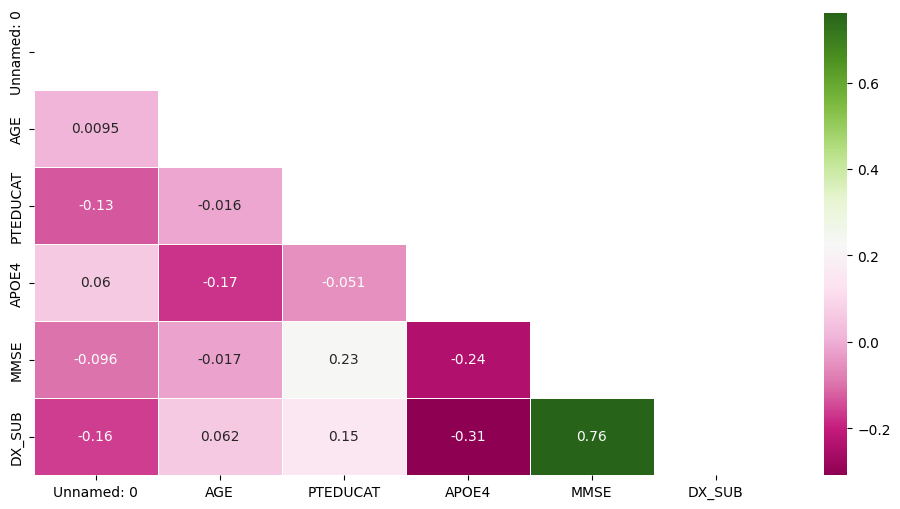

In [65]:
# miremos los datos

plt.figure(figsize=(12,6))
corr = df.corr()

# numpy zeros_like: return an array of zeros with the same shape and type as a given array.
mask = np.zeros_like(corr, dtype=bool)

# y esto es para obtener solamente un triangulo de la matriz simétrica
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), linewidths=.5, annot = True, mask = mask, cmap = 'PiYG')

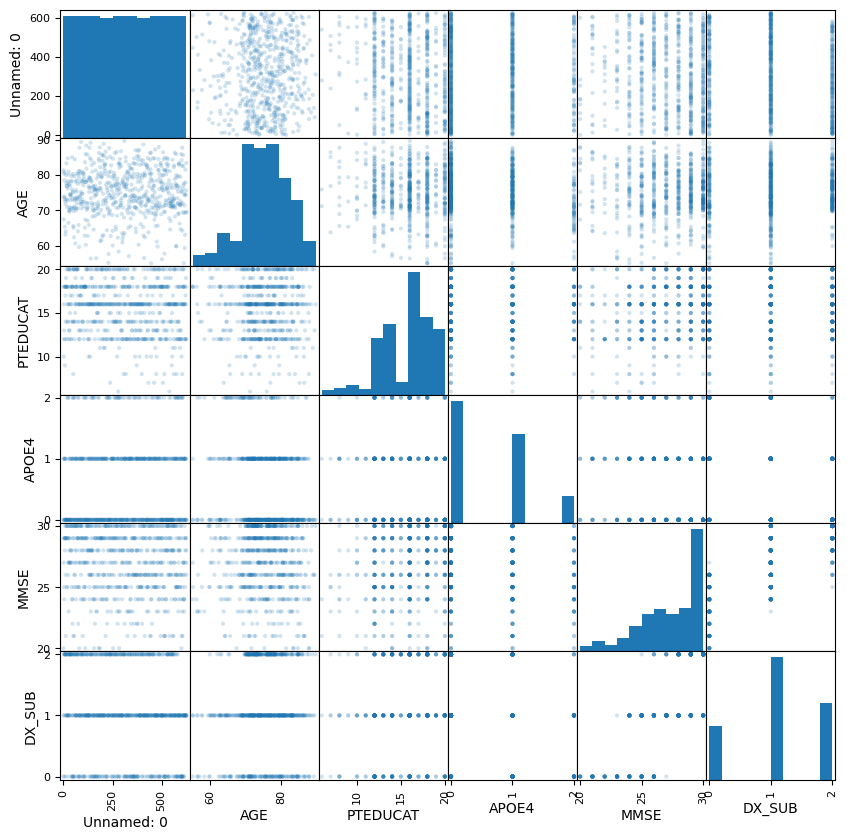

In [66]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#
scatter_matrix(df, alpha=0.2, figsize=(10, 10))

plt.show()


Preprocesamiento de datos:

In [67]:
# Identificar dónde están los NaN en el DataFrame
nan_positions = df.isna()

# Imprimir las posiciones de los NaN
print(nan_positions)

# Contar cuántos NaN hay en cada columna
nan_count = df.isna().sum()

# Imprimir la cantidad de NaN
print(nan_count)


     Unnamed: 0     DX    AGE  PTGENDER  PTEDUCAT  PTETHCAT  PTRACCAT  APOE4  \
0         False  False  False     False     False     False     False  False   
1         False  False  False     False     False     False     False  False   
2         False  False  False     False     False     False     False  False   
3         False  False  False     False     False     False     False  False   
4         False  False  False     False     False     False     False  False   
..          ...    ...    ...       ...       ...       ...       ...    ...   
623       False  False  False     False     False     False     False  False   
624       False  False  False     False     False     False     False  False   
625       False  False  False     False     False     False     False  False   
626       False  False  False     False     False     False     False  False   
627       False  False  False     False     False     False     False  False   

      MMSE  imputed_genotype  APOE Geno

 Hay 1 valor NaN en la columna imputed_genotype. Para manejar este valor NaN, se reemplazarlo con la media de esa columna o eliminar esa fila, dependiendo de lo que sea más apropiado para tu análisis.

In [68]:
# Reemplazar los NaN en 'imputed_genotype' con la media de la columna
df['imputed_genotype'] = df['imputed_genotype'].fillna(df['imputed_genotype'].mean())


Selección y transformación de características




“Carguemos nuestras variables (features: X) y nuestro valor target (y) que queremos predecir, que es el Diagnostico de Alzheimer”.

In [69]:

X = df[['AGE', 'PTEDUCAT', 'APOE4', 'imputed_genotype' ]]

y = df['DX_SUB']


Construcción del modelo



In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo AdaBoost
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del modelo AdaBoost es: {accuracy}')


La precisión del modelo AdaBoost es: 0.5185185185185185


Primera Conclusión=  Se ha obtenido una precisión del 51,85%. Esto significa que tu modelo predice correctamente el resultado aproximadamente la mitad del tiempo.

Mejorando el Modelo

Ajustar los parámetros del modelo:

> Para ajustar los parámetros del modelo AdaBoost, se usa la función GridSearchCV de scikit-learn. Esta función realiza una búsqueda exhaustiva sobre los valores de parámetros especificados para un estimador.





In [71]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Crear el modelo AdaBoost
model = AdaBoostClassifier(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f'Los mejores parámetros son: {grid_search.best_params_}')

# Predecir las etiquetas para el conjunto de prueba con el mejor modelo encontrado
y_pred = grid_search.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del modelo AdaBoost con los mejores parámetros es: {accuracy}')


Los mejores parámetros son: {'learning_rate': 0.1, 'n_estimators': 50}
La precisión del modelo AdaBoost con los mejores parámetros es: 0.6031746031746031


Ajustar Normalizando los datos :
> algunos modelos funcionan mejor con características que están en la misma escala.

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas 'AGE', 'PTEDUCAT', 'APOE4', 'imputed_genotype' como características (X)
X = df[['AGE', 'PTEDUCAT', 'APOE4', 'imputed_genotype' ]]

# Seleccionar la columna 'DX' como etiquetas (y)
y = df['DX']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el objeto StandardScaler y normalizar los datos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Crear el modelo AdaBoost
model = AdaBoostClassifier(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Ajustar el modelo a los datos de entrenamiento normalizados
grid_search.fit(X_train_scaled, y_train)

# Imprimir los mejores parámetros encontrados
print(f'Los mejores parámetros son: {grid_search.best_params_}')

# Predecir las etiquetas para el conjunto de prueba con el mejor modelo encontrado
y_pred = grid_search.predict(X_test_scaled)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del modelo AdaBoost con los mejores parámetros es: {accuracy}')


Los mejores parámetros son: {'learning_rate': 0.1, 'n_estimators': 50}
La precisión del modelo AdaBoost con los mejores parámetros es: 0.6031746031746031


Segunda Conclusión= A partir de Ajuste de los parametros y la Normalizacion de los datos, el modole de una presicion lel 60 %, mejorando la prediccion en 10 puntos porcentuales.